# FordGo-Bike bike sharing usage analysis
## by Souhail YOUSSEFI

## Investigation Overview

The goal of the investigation is to understand the usage of a bike sharing service called Ford Go Bike.

## Dataset Overview

The dataset consists of 183412 bike riding records on which 16 informations were collected. Out of this 16 informations, we will focus on :
* Three categorcial variables :
    * Gender (Male, Female, Other)
    * User type (Customer or Subscriber)
    * If the bike share represented the whole trip (Yes or No)
* Three numerical variables :
    * Distance from start to end station (in km)
    * Duration of the bik usage (in min)
    * User age
    


In this analysis, we will investigate three questions :
* What is the distribution of the distance traveled by users ?
* Is there a difference in terms usage duration between customers and subscribers ?
* Should the bike seat be more ergonomic or design (style) oriented ?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# I will directly load the cleaned data set
df = pd.read_csv('201902-fordgobike-tripdata_clean.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## What is the distribution of the distance traveled by users ?

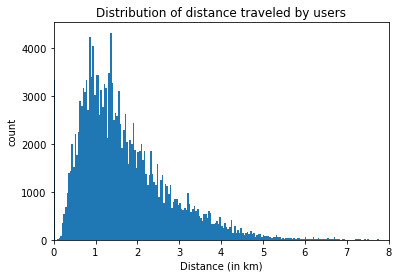

In [3]:
plt.hist(data=df, x='distance', bins=300);
plt.xlim((0,8));
plt.title('Distribution of distance traveled by users')
plt.ylabel('count')
plt.xlabel('Distance (in km)');

We can notice that, as expected, the distribution is right skewed. The longest trips are around 8 km (very few over this value). The majority of trips lay around 0 and 3 km. Not much trips are under 0.5 km as biking is probably not the way to go for users who could use other transporation ways (maybe walking ?).
Mixed with the number of users per year, this information could be used in many ways :
* Know how far needs to be the closest end station from the start one.
* Designing the next generation of Ford Go Bike in terms of sizing of mechanical components.
* Establish a maintenance strategy based on the expected wear of this coponents.

## Is there a difference in terms usage duration between customers and subscribers ?

Here we will focus on trips of maximum 1 hour.

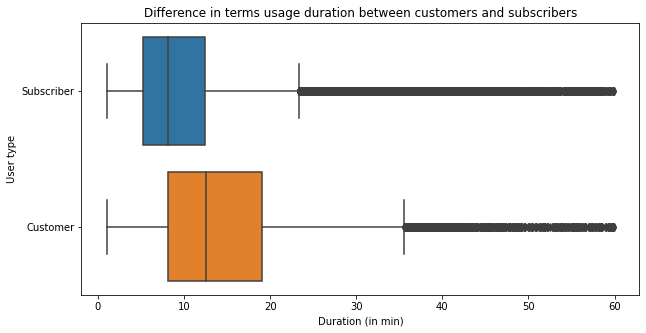

In [4]:
plt.figure(figsize = [10, 5])
df2 = df[df['duration_min'] < 60]
sb.boxplot(data=df2, y='user_type', x='duration_min');
plt.title('Difference in terms usage duration between customers and subscribers')
plt.ylabel('User type')
plt.xlabel('Duration (in min)');

The mean duration of a customer usage is higher than the mean duration of a subscriber. I was personally expecting the opposite, but this sheds lights on another possibility : that maybe subscribers use more often the bikes for shorter trips and that customers would rent only if the duration is higher. Before drawing any conclusions, we need to investigate if other parameters have an impact on duration, this can leed afterwards to some thinking about how to charge subscribers vs customers. 

##  Should the bike seat be more ergonomic or design (style) oriented ?



When the first generation was launched, the media criticised the bikes for their dull design. For the next generation, Ford are thinking about a new bike seat style. However to make it look sleek, they want to make it more narrow. Women have on average wider hips then men. In terms of comfort for long rides over 30 min (specially for 40+ women) a wider bike seat is better. So Ford would like to investigate if on the first generation, in the 40+ which of the genders used the bikes for longer periods. So the focus will be here on 40+ year old people and trips exceeding 20 min in duration.

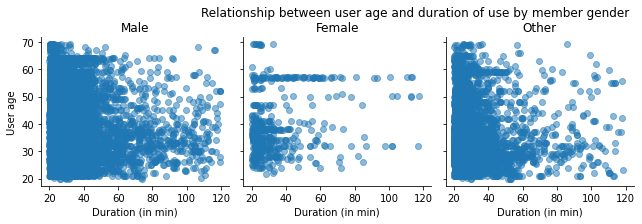

In [5]:
df3 = df[df['user_age'] > 40]
df3 = df[df['duration_min'] > 20]
g = sb.FacetGrid(data=df3, col='member_gender', margin_titles=True)
g.map(sb.regplot, 'duration_min', 'user_age', scatter_kws={'alpha':0.5}, y_jitter=0.2, fit_reg=False)
g.set_xlabels('Duration (in min)')
g.set_ylabels('User age')
axes = g.axes.flatten()
axes[0].set_title("Male")
axes[1].set_title("Female")
axes[2].set_title("Other")
plt.title('Relationship between user age and duration of use by member gender \n', loc='right');

We can notice that plots look kind of similar but that there is higher usage over longer durations for men specially over 30 min. This means we can probably orientate the design towards style without big impact over the biking experience of female 40+.

In [6]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 686837 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Souhail\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Souhail\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Souhail\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\Souhail\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\Souhail\anaconda3\lib\site-packages\nbconv